# Detector SNR 
Looking and SNR of spectra which go in the chi2 analysis to estimate a good sigma.

In [1]:
from utilities import masking
import numpy as np
from spectrum_overload import Spectrum
from astropy.io import fits
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
observations = [{"star": "HD4747", "obsnum": "1", "chip": "1"},
                {"star": "HD4747", "obsnum": "1", "chip": "2"},
                {"star": "HD4747", "obsnum": "1", "chip": "3"},
                {"star": "HD4747", "obsnum": "1", "chip": "4"},
                {"star": "HD30501", "obsnum": "2a", "chip": "1"},
                {"star": "HD30501", "obsnum": "2a", "chip": "2"},
                {"star": "HD30501", "obsnum": "2a", "chip": "3"},
                {"star": "HD30501", "obsnum": "2a", "chip": "4"},
                {"star": "HD30501", "obsnum": "2b", "chip": "1"},
                {"star": "HD30501", "obsnum": "2b", "chip": "2"},
                {"star": "HD30501", "obsnum": "2b", "chip": "3"},
                {"star": "HD30501", "obsnum": "2b", "chip": "4"},
                {"star": "HD30501", "obsnum": "3", "chip": "1"},
                {"star": "HD30501", "obsnum": "3", "chip": "2"},
                {"star": "HD30501", "obsnum": "3", "chip": "3"},
                {"star": "HD30501", "obsnum": "3", "chip": "4"},
                {"star": "HD211847", "obsnum": "1", "chip": "1"},
                {"star": "HD211847", "obsnum": "1", "chip": "2"},
                {"star": "HD211847", "obsnum": "1", "chip": "3"},
                {"star": "HD211847", "obsnum": "1", "chip": "4"},
                {"star": "HD211847", "obsnum": "2", "chip": "1"},
                {"star": "HD211847", "obsnum": "2", "chip": "2"},
                {"star": "HD211847", "obsnum": "2", "chip": "3"},
                {"star": "HD211847", "obsnum": "2", "chip": "4"},]


full snr 37.6448 Section snr 361.328


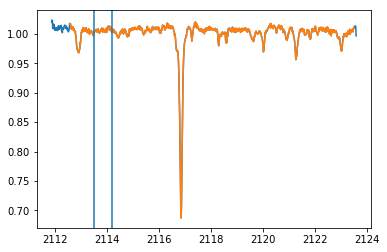

full snr 38.6754 Section snr 339.173


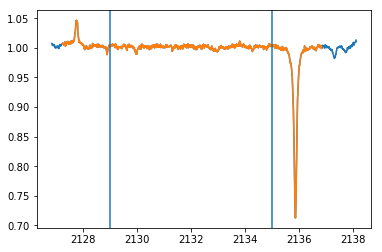

full snr 123.803 Section snr 364.766


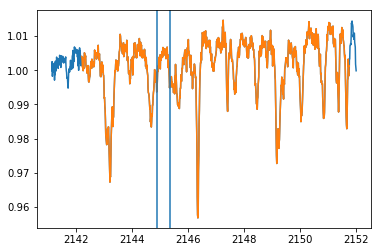

full snr 60.0083 Section snr 207.123


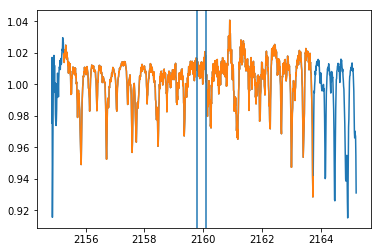

full snr 27.9864 Section snr 178.68


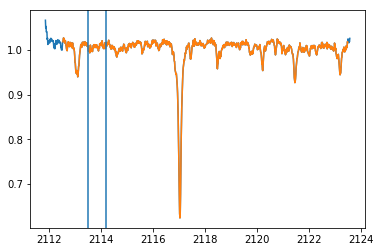

full snr 34.286 Section snr 195.359


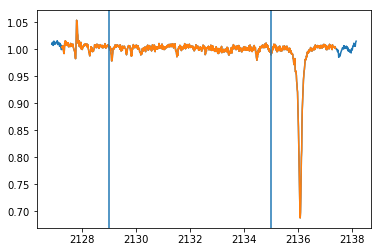

full snr 84.5612 Section snr 174.125


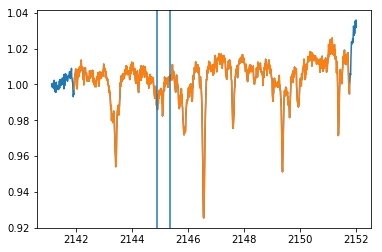

full snr 38.7268 Section snr 79.2258


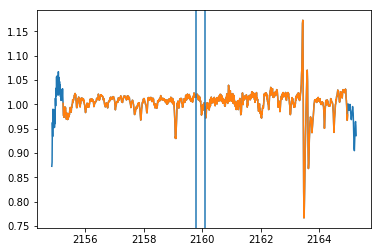

full snr 28.2535 Section snr 186.798


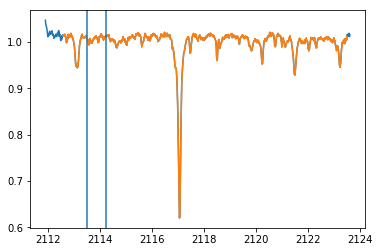

full snr 34.5909 Section snr 209.603


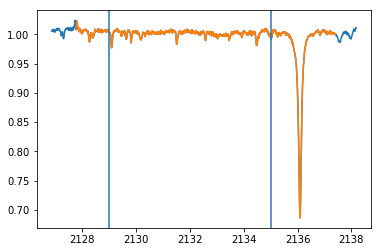

full snr 86.0091 Section snr 179.345


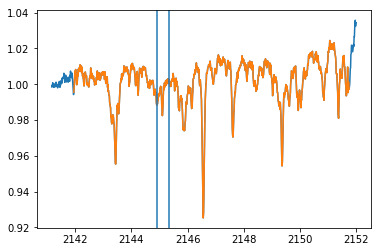

full snr 43.304 Section snr 91.5642


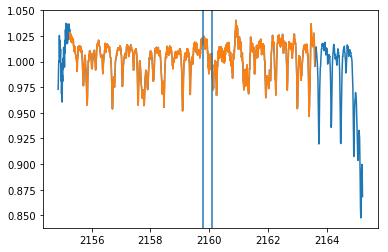

full snr 28.2819 Section snr 192.783


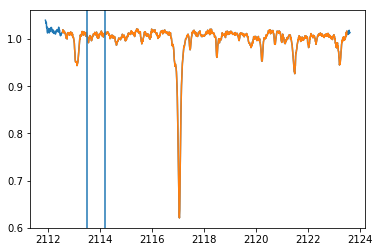

full snr 34.2768 Section snr 214.019


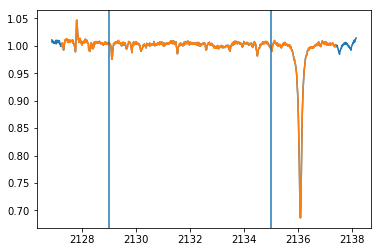

full snr 76.4076 Section snr 198.433


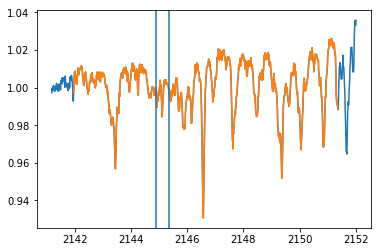

full snr 33.5927 Section snr 93.3763


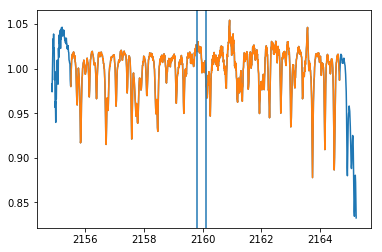

full snr 42.2634 Section snr 202.187


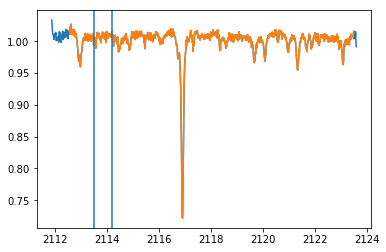

full snr 39.4826 Section snr 209.553


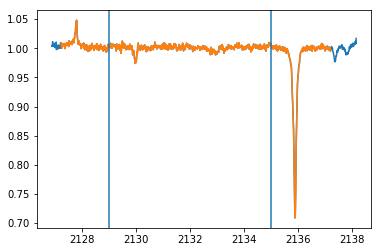

full snr 117.077 Section snr 283.249


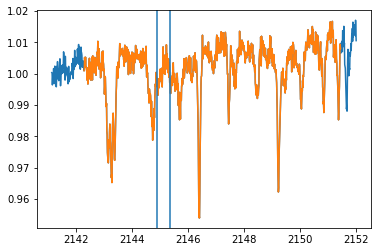

full snr 66.843 Section snr 188.078


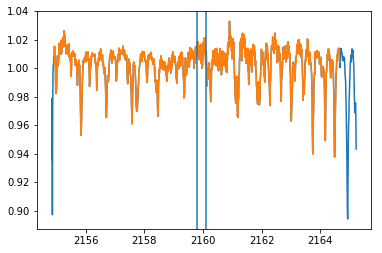

full snr 42.4795 Section snr 202.704


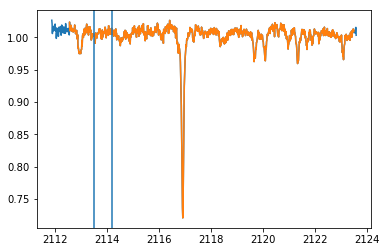

full snr 38.729 Section snr 246.059


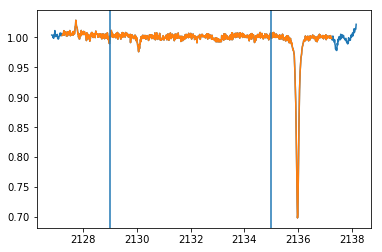

full snr 104.197 Section snr 291.192


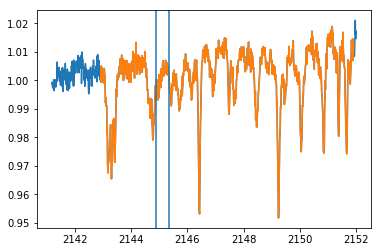

full snr 52.1507 Section snr 173.022


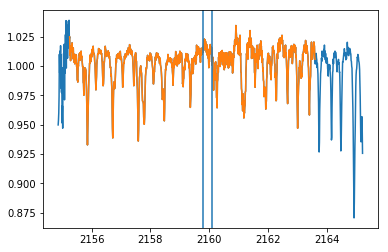

In [3]:
snrs = []
for obs in observations:
    
    masks = masking.get_maskinfo(obs["star"], obs["obsnum"], obs["chip"])

    # Load in a spectrum
    name = "{0}-{1}-mixavg-tellcorr_{2}.fits".format(obs["star"], obs["obsnum"], obs["chip"])
    data, hdr = fits.getdata(os.path.join("/home/jneal/.handy_spectra/", name), header=True)
    spec = Spectrum(xaxis=data["wavelength"], flux=data["flux"], header=hdr) 
    
    spec2 = spec.copy()
    
    for mask_limits in masks:
            if len(mask_limits) is not 2:
                raise ValueError("Mask limits in mask file is incorrect for {0}-{1}_{2}".format(obs["star"], obs["obsnum"], obs["chip"]))
            spec2.wav_select(*mask_limits)  # Wavelengths to include
    
    snr = np.nanmean(spec.flux) / np.std(spec.flux)

    plt.plot(spec.xaxis, spec.flux)
    plt.plot(spec2.xaxis, spec2.flux)
    
    if obs["chip"] == "1":
        # lim = [2118.8, 2119.4]
        lim = [2113.5, 2114.2]
        
    elif obs["chip"] == "2":
        lim = [2129, 2135]
        
    elif obs["chip"] == "3":
        lim = [2144.9, 2145.35]
       
    else:
       lim = [2159.8, 2160.1]
    plt.axvline(x=lim[0])
    plt.axvline(x=lim[1])   

    spec.wav_select(*lim)
    sec_snr = np.nanmean(spec.flux)/ np.nanstd(spec.flux)
    snrs.append(sec_snr)
    print("full snr", snr, "Section snr", sec_snr)
    plt.show()
    

In [4]:
print("average snr", np.mean(snrs))
print("median snr", np.median(snrs))

average snr 210.906
median snr 200.31


In [5]:
datafile = "/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:08:29.976_1.nod.ms.fits"
datafile = "/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:08:29.976_1.nod.ms.sum.fits"

data = fits.getdata(datafile)
print(data[0])
print(data[1])
data[2]

[[  43123.6328125    46106.84375      48405.72265625 ...,  115634.40625
   115449.03125     116886.0703125 ]]
[[  43228.78125     46220.984375    48476.4609375 ...,  115590.40625
   115402.21875    117762.       ]]


array([[ 226.51933289,  233.85580444,  239.68647766, ...,  365.97677612,
         365.70599365,  392.41503906]], dtype=float32)

# Conclusions

Am going to use a fix snr of 200 to perform the chi**2 analysis for now.